In [1]:
import itertools
import numpy as np
from numpy import pi
from qiskit import Aer, QuantumCircuit
from qiskit.compiler import transpile
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks

In [8]:
# Create random states
ψ = StateDiscriminativeQuantumNeuralNetworks.random_quantum_state()
ϕ = StateDiscriminativeQuantumNeuralNetworks.random_quantum_state()

# Parameters
N = 3
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = [0,0], [pi,0]
th_v1, th_v2 = [0,0], [0,0]
fi_v1, fi_v2 = [0,0], [0,0]
lam_v1, lam_v2 = [0,0],  [0,0]

params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = StateDiscriminativeQuantumNeuralNetworks([ψ, ϕ])

# Calculate cost function
discriminator.cost_function(params)

0.189697265625

In [9]:
circuit = StateDiscriminativeQuantumNeuralNetworks.get_n_element_povm( N, th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2)

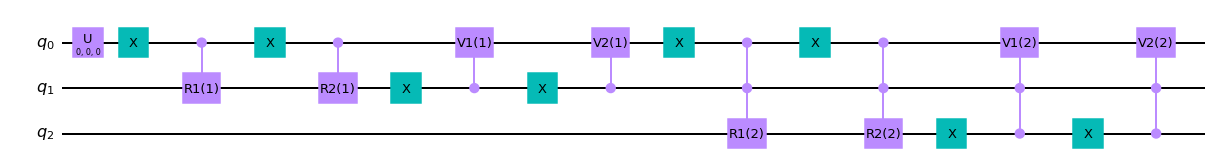

In [10]:
circuit.draw(output='mpl')

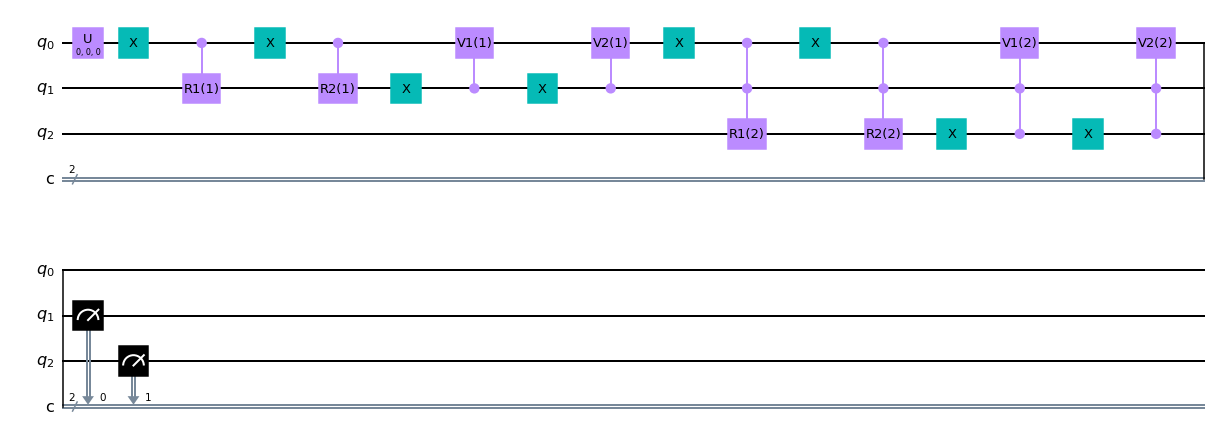

In [6]:
qc1 = QuantumCircuit(N, N-1 )
qc1.compose( circuit, range(N), inplace=True )
qc1.measure(range(1,N) , range(N-1) )
qc1.draw(output='mpl')

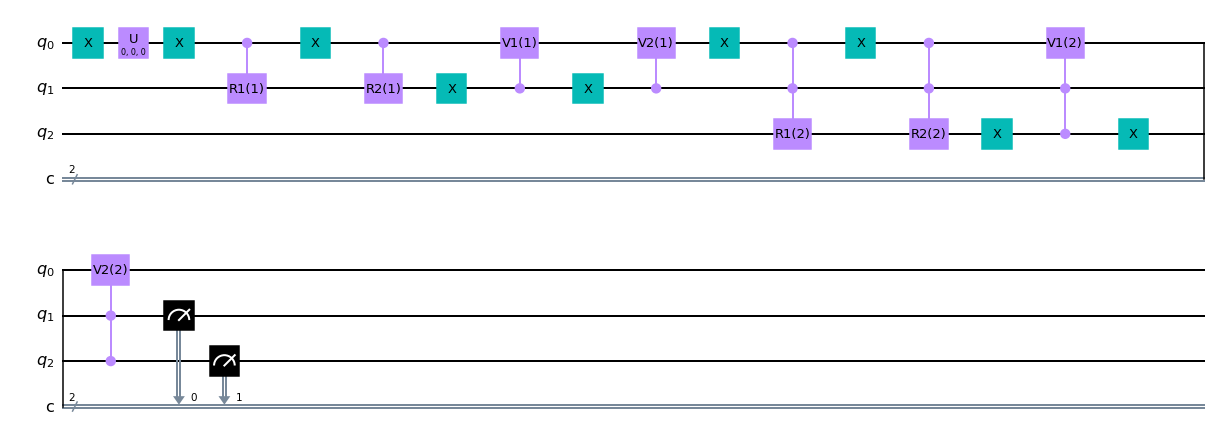

In [7]:
qc2 = QuantumCircuit(N, N-1 )
qc2.x(0)
qc2.compose( circuit, range(N), inplace=True )
qc2.measure(range(1,N) , range(N-1) )
qc2.draw(output='mpl')

In [20]:
backend_sim = Aer.get_backend(discriminator._backend)

In [21]:
qcs = transpile( [qc1,qc2], backend_sim) 

In [22]:
results = backend_sim.run( qcs ).result()

In [23]:
results.get_counts(qc1)

{'00': 1024}

In [24]:
results.get_counts(qc2)

{'01': 1024}

In [ ]:
p_psi_1 = p['01'] 

In [ ]:
p_phi_0 = p['00']

In [ ]:
p_err = .5*p_psi_1 + .5*p_phi_0

In [ ]:
p_inc  = p['10'] + p['11']

In [ ]:
cf = alpha_err*p_err + alpha_inc*p_inc

In [ ]:
state0 = np.array([ 1, 0 ])
state1 0 np.array([ cos(theta), sen(theta) ])